In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [3]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

dew  humidity  pressure  temperature     timestamp  volt
1728143546  25.35     92.14   1013.04        26.73  1.728144e+09  4.06
1728143606  25.33     92.10   1013.00        26.72  1.728144e+09  4.05
1728143666  25.32     92.09   1012.98        26.71  1.728144e+09  4.05
1728143726  25.33     92.07   1012.98        26.73  1.728144e+09  4.05
1728143786  25.32     92.13   1012.95        26.71  1.728144e+09  4.05
1728143846  25.30     92.17   1012.94        26.68  1.728144e+09  4.05
1728143906  25.31     92.20   1012.91        26.68  1.728144e+09  4.05
1728143966  25.30     92.13   1012.90        26.69  1.728144e+09  4.05
1728144026  25.31     92.21   1012.92        26.68  1.728144e+09  4.05
1728144086  25.27     92.17   1012.86        26.65  1.728144e+09  4.05

In [4]:
cuacaT.describe()

dew       humidity       pressure    temperature  \
count  417602.000000  417603.000000  417603.000000  417603.000000   
mean       25.015596      85.668991    1011.435199      27.825977   
std         1.507748      11.138451       2.787745       3.275287   
min        17.670000       0.000000       0.000000       0.020000   
25%        24.150000      76.890000    1010.200000      25.410000   
50%        25.100000      90.060000    1011.480000      26.940000   
75%        26.060000      94.730000    1012.770000      30.300000   
max        29.700000      99.580000    1016.530000      41.120000   

          timestamp           volt  
count  4.176030e+05  417603.000000  
mean   1.715285e+09       4.091025  
std    7.911916e+06       0.030956  
min    0.000000e+00       0.000000  
25%    1.708755e+09       4.070000  
50%    1.715384e+09       4.090000  
75%    1.721725e+09       4.120000  
max    1.728144e+09       4.170000

In [5]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt
1728143546  25.35     92.14   1013.04        26.73  1728143546  4.06
1728143606  25.33     92.10   1013.00        26.72  1728143606  4.05
1728143666  25.32     92.09   1012.98        26.71  1728143666  4.05
1728143726  25.33     92.07   1012.98        26.73  1728143726  4.05
1728143786  25.32     92.13   1012.95        26.71  1728143786  4.05
1728143846  25.30     92.17   1012.94        26.68  1728143846  4.05
1728143906  25.31     92.20   1012.91        26.68  1728143906  4.05
1728143966  25.30     92.13   1012.90        26.69  1728143966  4.05
1728144026  25.31     92.21   1012.92        26.68  1728144026  4.05
1728144086  25.27     92.17   1012.86        26.65  1728144086  4.05

In [6]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

# Mengubah format waktu menjadi '%Y-%m-%d %H:%M:%S' dalam WIB
cuacaT['timestamp'] = cuacaT['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Menampilkan 10 data terakhir
cuacaT.tail(10)

dew  humidity  pressure  temperature            timestamp  volt
1728143546  25.35     92.14   1013.04        26.73  2024-10-05 22:52:26  4.06
1728143606  25.33     92.10   1013.00        26.72  2024-10-05 22:53:26  4.05
1728143666  25.32     92.09   1012.98        26.71  2024-10-05 22:54:26  4.05
1728143726  25.33     92.07   1012.98        26.73  2024-10-05 22:55:26  4.05
1728143786  25.32     92.13   1012.95        26.71  2024-10-05 22:56:26  4.05
1728143846  25.30     92.17   1012.94        26.68  2024-10-05 22:57:26  4.05
1728143906  25.31     92.20   1012.91        26.68  2024-10-05 22:58:26  4.05
1728143966  25.30     92.13   1012.90        26.69  2024-10-05 22:59:26  4.05
1728144026  25.31     92.21   1012.92        26.68  2024-10-05 23:00:26  4.05
1728144086  25.27     92.17   1012.86        26.65  2024-10-05 23:01:26  4.05

In [7]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [8]:
datacuaca = (lambda: _deepnote_execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
datacuaca

dew  humidity  pressure  temperature           timestamp  volt
0       22.62     89.33   1011.29        24.49 1970-01-01 07:00:00  4.06
1       23.29     89.28   1010.72        25.18 2023-12-11 19:13:51  4.08
2       23.29     89.38   1010.75        25.16 2023-12-11 19:14:51  4.08
3       23.31     89.58   1010.76        25.14 2023-12-11 19:15:51  4.08
4       23.35     89.86   1010.82        25.13 2023-12-11 19:16:51  4.08
...       ...       ...       ...          ...                 ...   ...
417598  25.30     92.17   1012.94        26.68 2024-10-05 22:57:26  4.05
417599  25.31     92.20   1012.91        26.68 2024-10-05 22:58:26  4.05
417600  25.30     92.13   1012.90        26.69 2024-10-05 22:59:26  4.05
417601  25.31     92.21   1012.92        26.68 2024-10-05 23:00:26  4.05
417602  25.27     92.17   1012.86        26.65 2024-10-05 23:01:26  4.05

[417603 rows x 6 columns]

In [9]:
(lambda: DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [10]:
datacuaca

dew  humidity  pressure  temperature           timestamp  volt
0       22.62     89.33   1011.29        24.49 1970-01-01 07:00:00  4.06
1       23.29     89.28   1010.72        25.18 2023-12-11 19:13:51  4.08
2       23.29     89.38   1010.75        25.16 2023-12-11 19:14:51  4.08
3       23.31     89.58   1010.76        25.14 2023-12-11 19:15:51  4.08
4       23.35     89.86   1010.82        25.13 2023-12-11 19:16:51  4.08
...       ...       ...       ...          ...                 ...   ...
417598  25.30     92.17   1012.94        26.68 2024-10-05 22:57:26  4.05
417599  25.31     92.20   1012.91        26.68 2024-10-05 22:58:26  4.05
417600  25.30     92.13   1012.90        26.69 2024-10-05 22:59:26  4.05
417601  25.31     92.21   1012.92        26.68 2024-10-05 23:00:26  4.05
417602  25.27     92.17   1012.86        26.65 2024-10-05 23:01:26  4.05

[417603 rows x 6 columns]

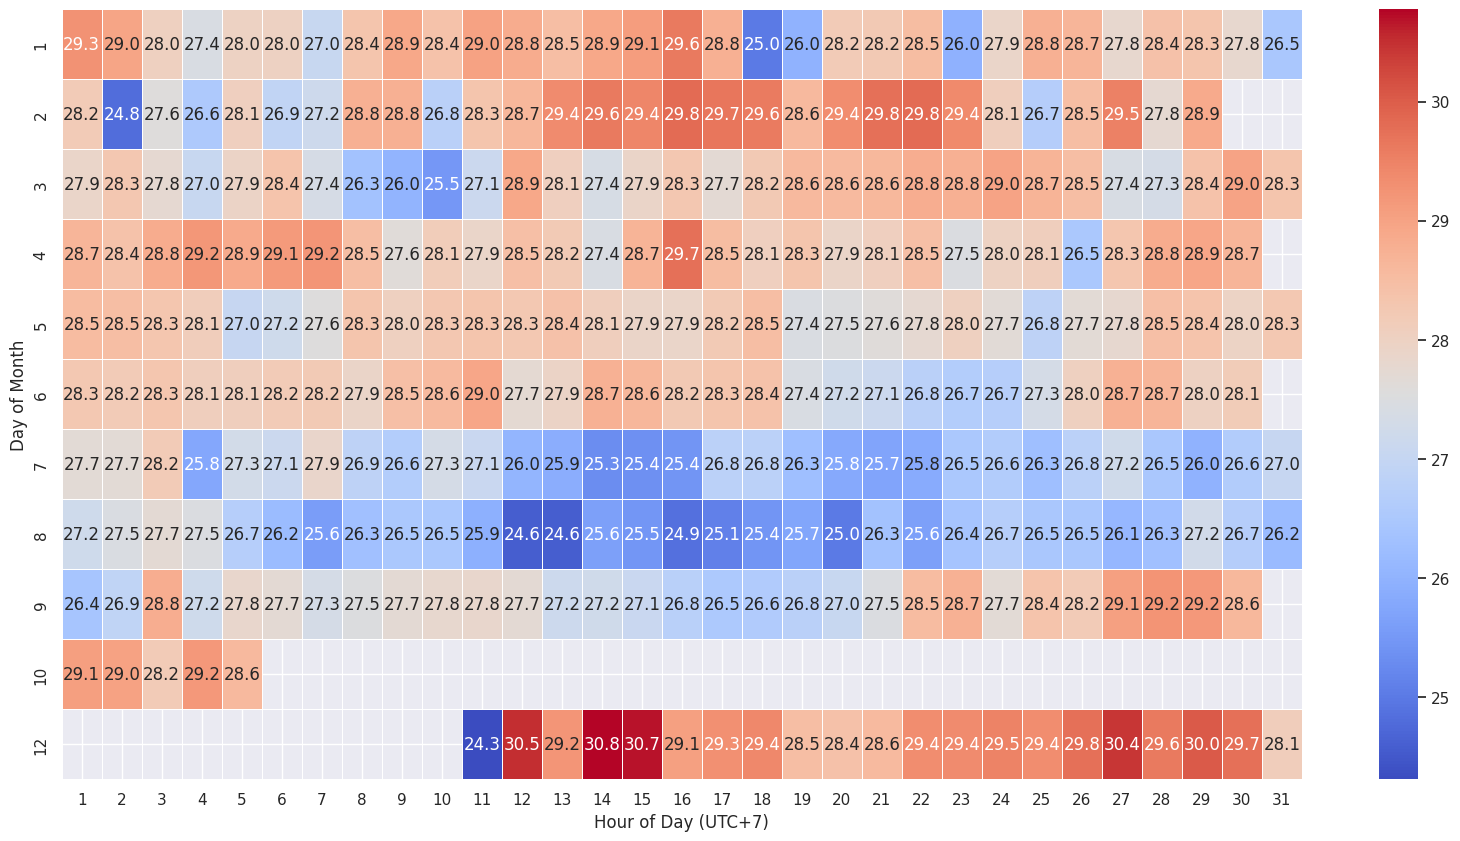

In [11]:
# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['month'] =datacuaca['timestamp'].dt.month

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped1 = datacuaca.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()
datacuaca_grouped2 = datacuaca.groupby(['month', 'day']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot1 = datacuaca_grouped1.pivot(index='day', columns='hour', values='temperature')
temperature_pivot2 = datacuaca_grouped2.pivot(index='month', columns='day', values='temperature')
# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot2, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()


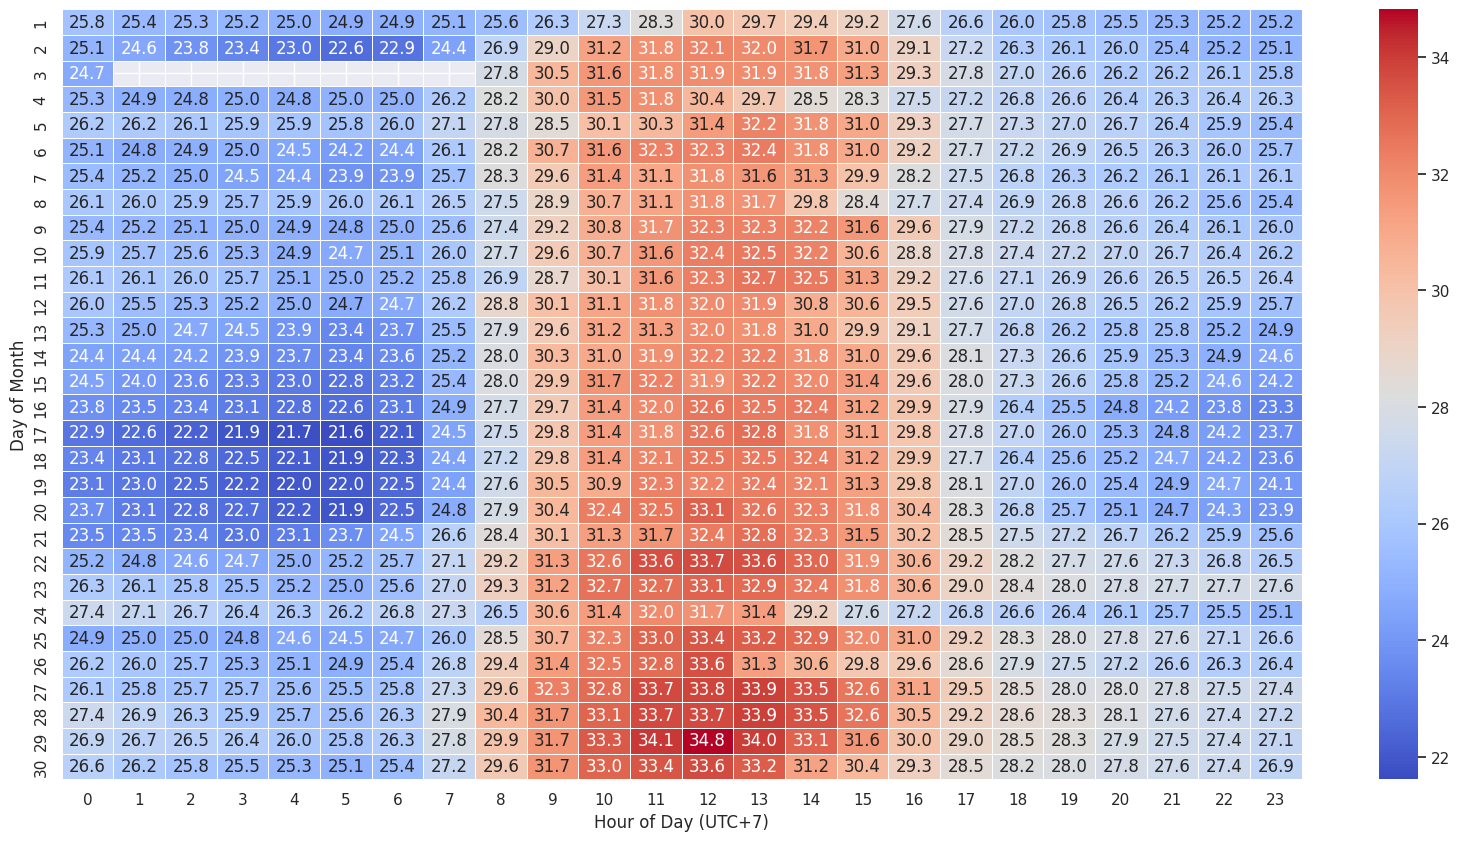

In [12]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == 9)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()


In [13]:
# Mencari 10 nilai suhu terendah beserta tanggalnya
lowest_temperatures = datacuaca.nsmallest(10, 'temperature')[['timestamp', 'temperature']]
# Mencari 10 nilai suhu tertinggi beserta tanggalnya
highest_temperatures = datacuaca.nlargest(10, 'temperature')[['timestamp', 'temperature']]

# Menampilkan hasil
print(lowest_temperatures)
# Menampilkan hasil
print(highest_temperatures)

                 timestamp  temperature
19394  2023-12-26 04:09:50         0.02
342253 2024-08-13 05:52:19        18.92
342256 2024-08-13 05:55:19        18.93
342246 2024-08-13 05:45:19        18.94
342254 2024-08-13 05:53:19        18.94
342255 2024-08-13 05:54:19        18.94
342257 2024-08-13 05:56:19        18.94
342259 2024-08-13 05:58:19        18.94
342248 2024-08-13 05:47:19        18.95
342249 2024-08-13 05:48:19        18.95
               timestamp  temperature
3303 2023-12-14 09:33:07        41.12
3304 2023-12-14 09:34:08        41.11
3305 2023-12-14 09:35:08        41.11
516  2023-12-12 09:39:03        40.98
3302 2023-12-14 09:32:08        40.97
3306 2023-12-14 09:36:08        40.90
515  2023-12-12 09:38:01        40.84
3299 2023-12-14 09:29:08        40.81
3301 2023-12-14 09:31:08        40.79
514  2023-12-12 09:37:01        40.77


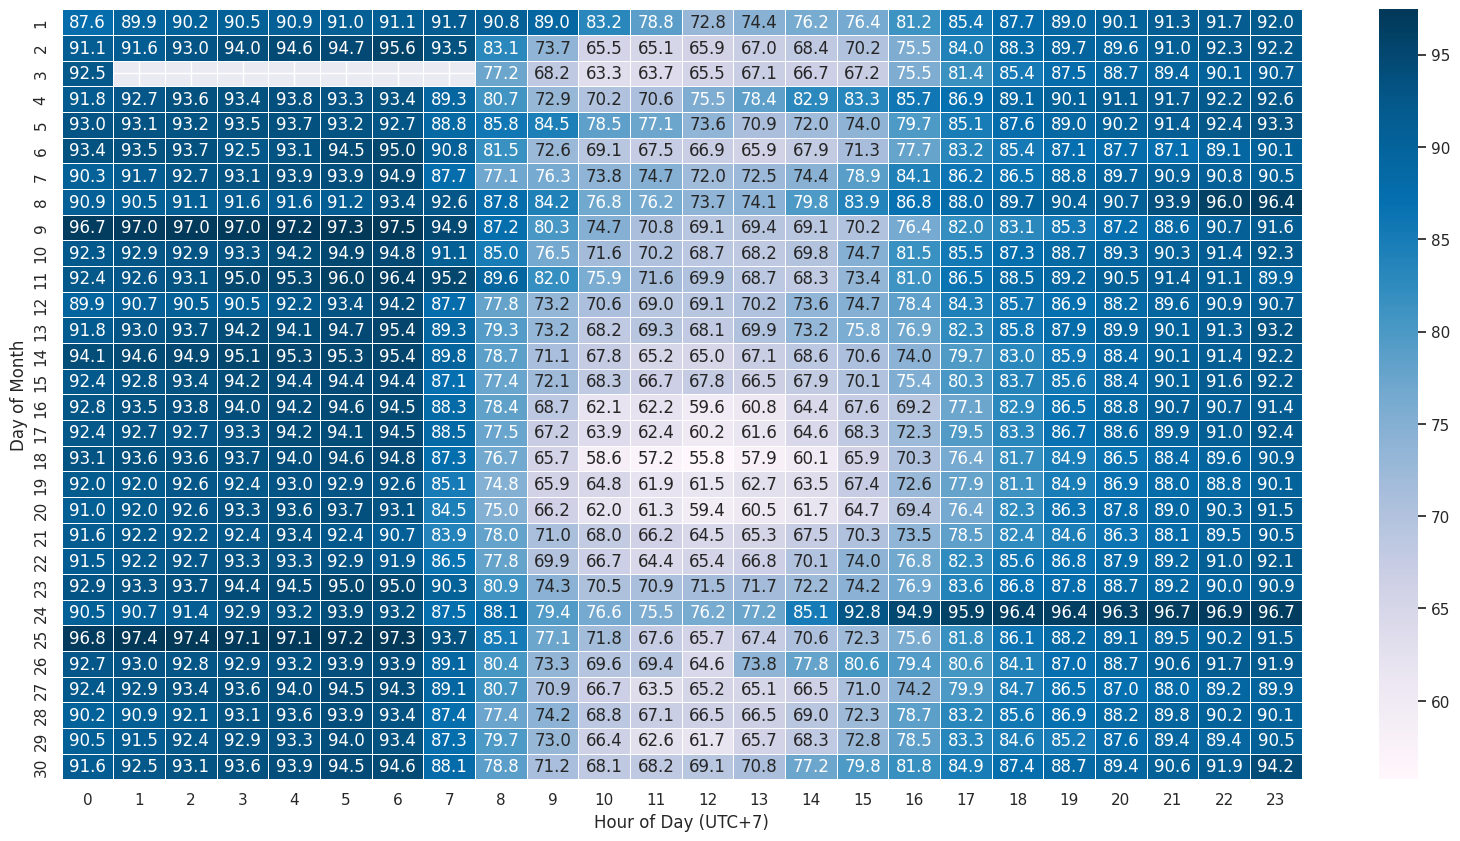

In [14]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == 9)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="PuBu")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(216.25, 0.5, 'Day of Month')

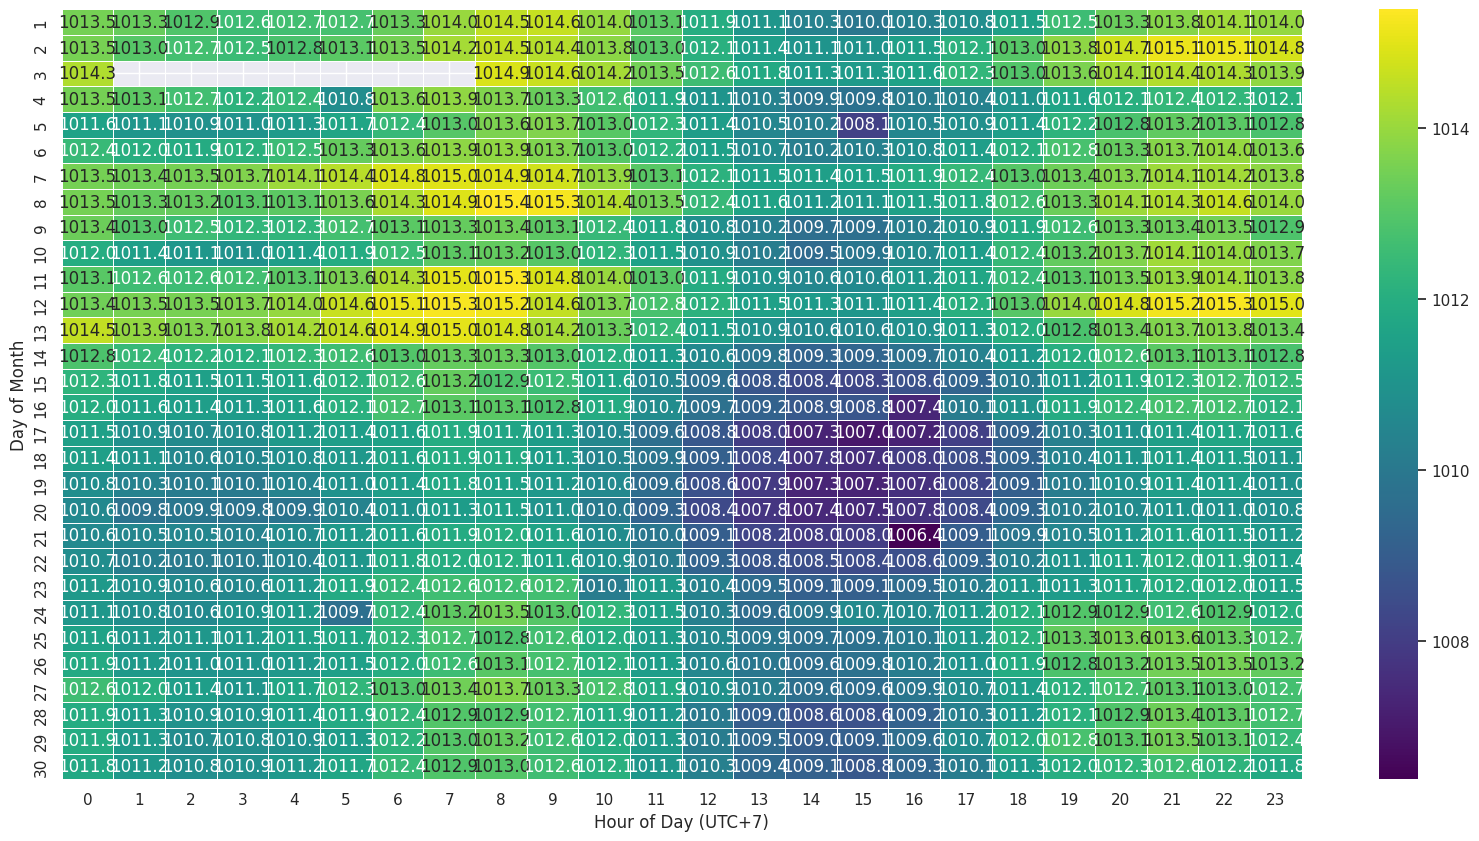

In [15]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == 9)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(216.25, 0.5, 'Day of Month')

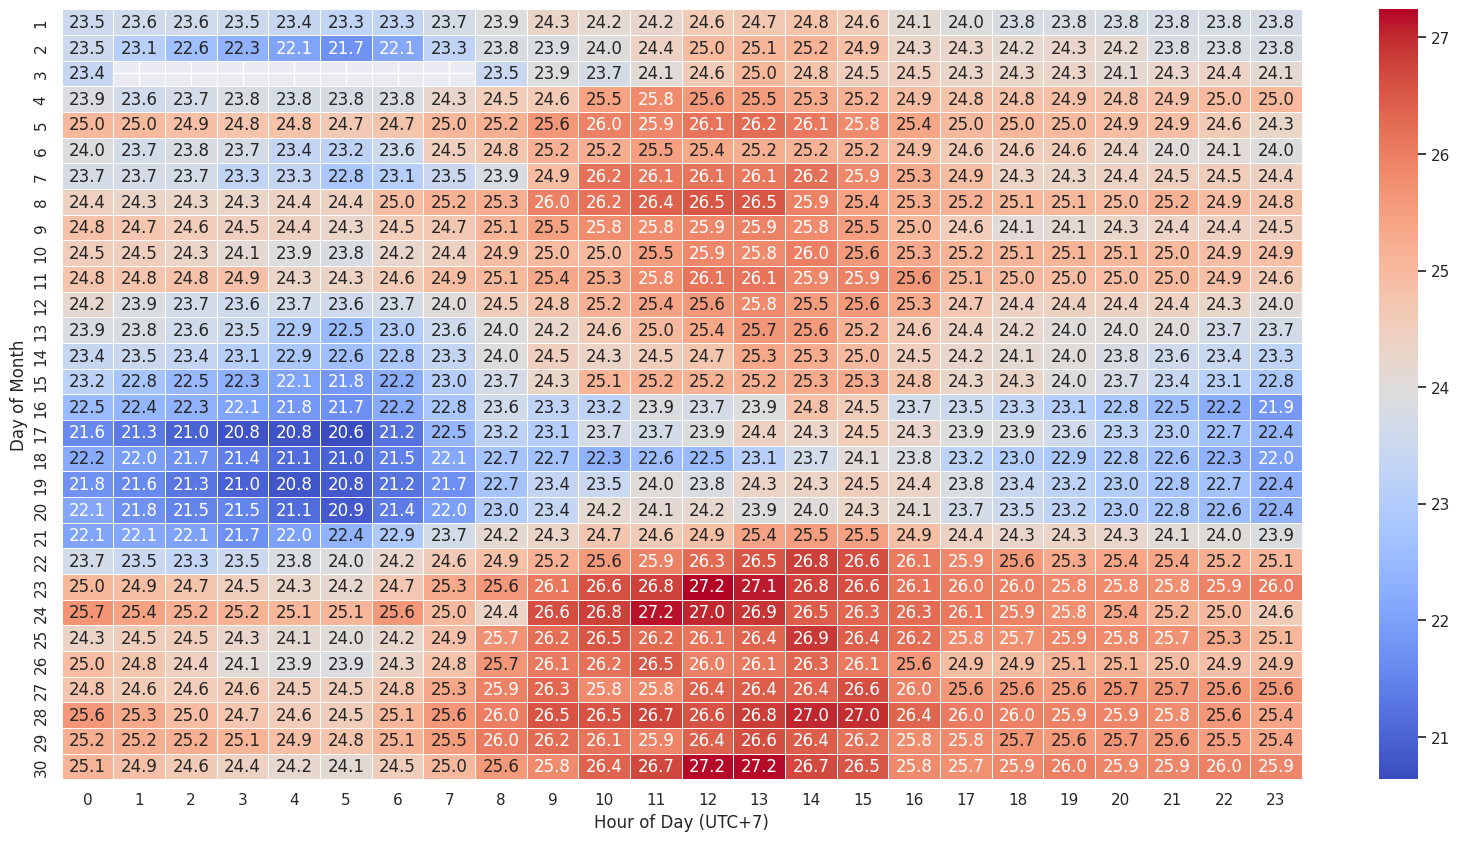

In [16]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == 9)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'dew': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='dew')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

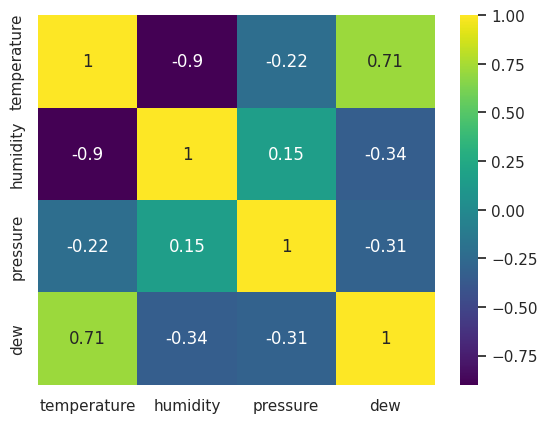

In [21]:
correlation_matrix = datacuaca[['temperature', 'humidity', 'pressure', 'dew']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


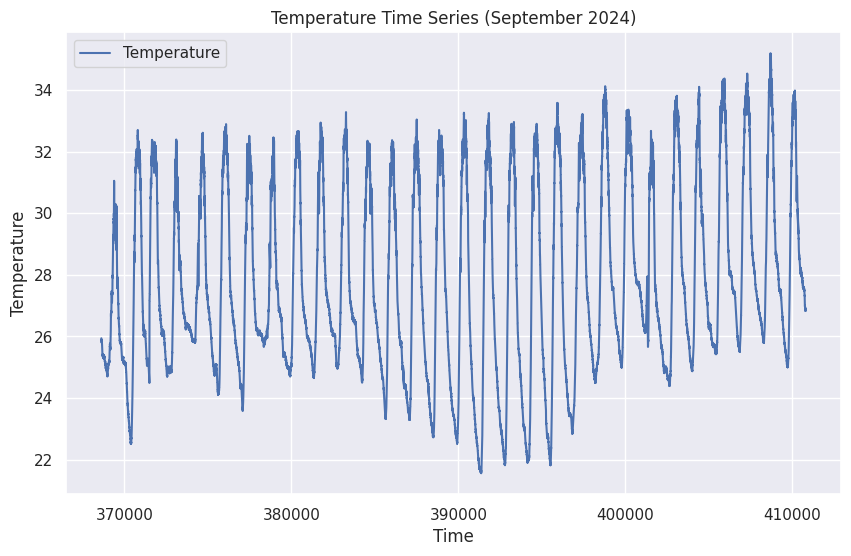

/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                33748

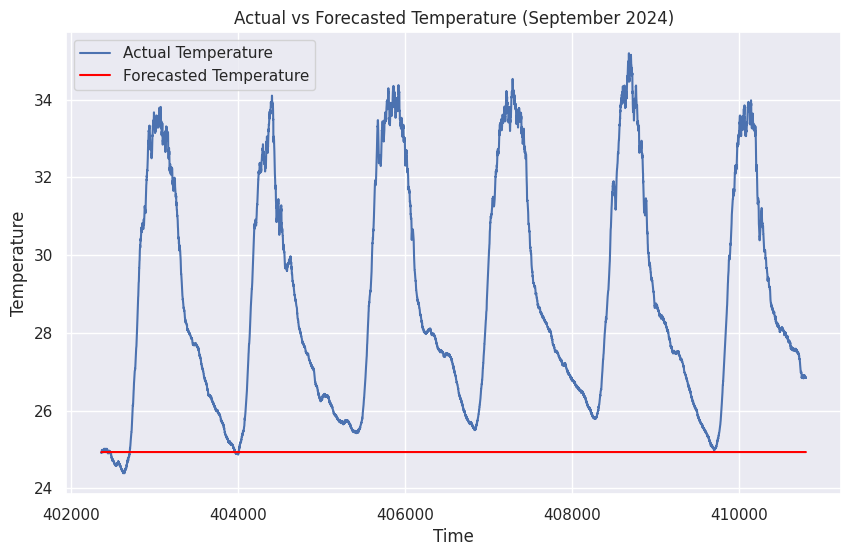

Root Mean Squared Error: 4.852086680567675


In [31]:
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Filter data hanya untuk bulan September 2024
custom_data = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == 9)]

# Mengambil data temperature sebagai target peramalan
temperature_data = custom_data['temperature'].dropna()

# Plotting data suhu bulan September 2024
plt.figure(figsize=(10, 6))
plt.plot(temperature_data.index, temperature_data, label='Temperature')
plt.title('Temperature Time Series (September 2024)')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(temperature_data) * 0.8)
train_data, test_data = temperature_data[:train_size], temperature_data[train_size:]

# Membuat model ARIMA (p, d, q) - parameter bisa dicoba-coba (dalam contoh ini: (5,1,0))
model = ARIMA(train_data, order=(1,1,0))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

# Membuat prediksi
forecast = model_fit.forecast(steps=len(test_data))

# Visualisasi prediksi vs data asli
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Temperature')
plt.plot(test_data.index, forecast, color='red', label='Forecasted Temperature')
plt.title('Actual vs Forecasted Temperature (September 2024)')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Menghitung error menggunakan RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"Root Mean Squared Error: {rmse}")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>